In [2]:
!pip install hdbscan==0.8.40
!pip install geopandas==1.0.1
!pip install contextily==1.6.2
!pip install shapely==2.0.6

   ---------------------------------------- 0.0/726.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/726.2 kB ? eta -:--:--
   ---------------------------------------- 726.2/726.2 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   -- ------------------------------------- 1.0/19.2 MB 5.6 MB/s eta 0:00:04
   ---- ----------------------------------- 2.1/19.2 MB 5.9 MB/s eta 0:00:03
   ------ --------------------------------- 3.1/19.2 MB 5.4 MB/s eta 0:00:03
   ------- -------------------------------- 3.7/19.2 MB 4.5 MB/s eta 0:00:04
   -------- ------------------------------- 4.2/19.2 MB 4.1 MB/s eta 0:00:04
   ----------- ---------------------------- 5.5/19.2 MB 4.4 MB/s eta 0:00:04
   ------------- -------------------------- 6.6/19.2 MB 4.6 MB/s eta 0:00:03
   -------------- ------------------------- 6.8/19.2 MB 4.5 MB/s eta 0:00:03
   ---------------- ----------------------- 7.9/19.2 MB 4.2 MB/s eta 0:00:03
   ------------

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.preprocessing import StandardScaler


# geographical tools
import geopandas as gpd # pandas dataframe-like geodataframes for geographical data
import contextily as csx # used for obtianing a basemap of Canada
from shapely.geometry import Point

import warnings
warnings.filterwarnings('ignore')


In [12]:
import requests
import zipfile
import io
import os

# URL of the ZIP file on the cloud server
zip_file_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/YcUk-ytgrPkmvZAh5bf7zA/Canada.zip'

# Directory to save the extracted TIFF file
output_dir = './'
os.makedirs(output_dir, exist_ok=True)

# Step 1: Download the ZIP file
response = requests.get(zip_file_url)
response.raise_for_status() # Ensure the request was successful

# Step 2: Open the ZIP file in memory
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        for file_name in zip_ref.namelist():
            if file_name.endswith('.tif'):# Check if it's a TIFF file
                # Step 4: Extract the TIFF file
                zip_ref.extract(file_name, output_dir)
                print(f"Downloaded and extracted: {file_name}")


Downloaded and extracted: Canada.tif


In [16]:
# Write a function that plots clustered locations and overlays them on a basemap.
def plot_clustered_locations(df,  title='Museums Clustered by Proximity'):
    """
    Plots clustered locations and overlays on a basemap.
    
    Parameters:
    - df: DataFrame containing 'Latitude', 'Longitude', and 'Cluster' columns
    - title: str, title of the plot
    """
    # Load the coordinates into a GeoDataFrame
    gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df['Longitude'],df['Latitude']),crs="EPSG:4326")
    
    # Reproject to Web Mercator to align with basemap 
    gdf = gdf.to_crs(epsg=3857)
    # Create the plot
    fig, ax = plt.subplots(figsize=(15, 10))

    # Separate non-noise, or clustered points from noise, or unclustered points
    non_noise = gdf[gdf['cluster'] != -1]
    noise = gdf[gdf[cluster] != -1]

    # Plot noise points 
    noise.plot(ax=ax,color='k',markersize=30,ec='r',alpha=1,label='Noise')

    # Plot clustered points, colured by 'Cluster' number
    non_noise.plot(ax=ax,column='cluster',camp='tab10',markersize=30,ec='k',legend=False,alpha=0.6)

    # Add basemap of  Canada
    ctx.add_basemap(ax, source='./Canada.tif', zoom=4)

    # Format plot
    plt.title(title, )
    plt.xlabel('Longitude', )
    plt.ylabel('Latitude', )
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()

    plt.show()
    

In [18]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/r-maSj5Yegvw2sJraT15FA/ODCAF-v1-0.csv'
df = pd.read_csv(url, encoding = "ISO-8859-1")
df.head()

,Index,Facility_Name,Source_Facility_Type,ODCAF_Facility_Type,Provider,Unit,Street_No,Street_Name,Postal_Code,City,Prov_Terr,Source_Format_Address,CSD_Name,CSDUID,PRUID,Latitude,Longitude
0,1,#Hashtag Gallery,..,gallery,toronto,..,801,dundas st w,M6J 1V2,toronto,on,801 dundas st w,Toronto,3520005,35,43.65169472,-79.40803272
1,2,'Ksan Historical Village & Museum,historic site-building or park,museum,canadian museums association,..,1500,62 hwy,V0J 1Y0,hazelton,bc,1500 hwy 62 hazelton british columbia v0j 1y0 ...,Hazelton,5949022,59,55.2645508,-127.6428124
2,3,'School Days' Museum,community/regional museum,museum,canadian museums association,..,427,queen st,E3B 5R6,fredericton,nb,427 queen st fredericton new brunswick e3b 5r6...,Fredericton,1310032,13,45.963283,-66.6419017
3,4,10 Austin Street,built heritage properties,heritage or historic site,moncton,..,10,austin st,E1C 1Z6,moncton,nb,10 austin st,Moncton,1307022,13,46.09247776,-64.78022946
4,5,10 Gates Dancing Inc.,arts,miscellaneous,ottawa,..,..,..,..,ottawa,on,..,Ottawa,3506008,35,45.40856224,-75.71536766


### Exercise 2. Display the facility types and their counts

In [39]:
print(df['ODCAF_Facility_Type'].value_counts())

ODCAF_Facility_Type
library or archives                     3013
museum                                  1938
gallery                                  810
heritage or historic site                620
theatre/performance and concert hall     583
festival site                            346
miscellaneous                            343
art or cultural centre                   225
artist                                    94
Name: count, dtype: int64


### Exercise 3. Filter the data to only include museums.
Check your results. Did you get as many as you expected?

In [48]:
df = df[df.ODCAF_Facility_Type == 'museum']
df.ODCAF_Facility_Type.value_counts()

ODCAF_Facility_Type
museum    1938
Name: count, dtype: int64

### Exercise 4.  Select only the Latitude and Longitude features as inputs to our clustering problem.
Also, display information about the coordinates like counts and data types.

In [53]:
df = df[['Latitude','Longitude']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 1 to 7969
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Latitude   1938 non-null   object
 1   Longitude  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


### Exercise 5. We'll need these coordinates to be floats, not objects.
Remove any museums that don't have coordinates, and convert the remaining coordinates to floats.

In [55]:
# Remove observations with no coordinates 
df = df[df.Latitude!='..']

# Convert to float
df[['Latitude','Longitude']] = df[['Latitude','Longitude']].astype('float')

In [57]:
df

,Latitude,Longitude
1,55.264551,-127.642812
2,45.963283,-66.641902
8,49.176354,-123.112783
13,49.261938,-123.151123
15,49.889559,-97.235744
...,...,...
7934,43.183090,-79.224564
7936,43.690022,-79.476208
7940,43.857692,-79.361940
7968,48.422420,-123.343553


## Build a DBSCAN model
##### Correctly scale the coordinates for DBSCAN (since DBSCAN is sensitive to scale)

In [61]:
# In this case we know how to scale the coordinates. Using standardization would be an error becaues we aren't using the full range of the lat/lng coordinates.
# Since latitude has a range of +/- 90 degrees and longitude ranges from 0 to 360 degrees, the correct scaling is to double the longitude coordinates (or half the Latitudes)
coords_scaled = df.copy()
coords_scaled["Latitude"] = 2*coords_scaled["Latitude"]

### Apply DBSCAN with Euclidean distance to the scaled coordinates
In this case, reasonable neighbourhood parameters are already chosen for you. Feel free to experiment.

In [64]:
min_samples=3 # minimum number of samples needed to form a neighbourhood
eps=1.0 # neighbourhood search radius
metric='euclidean' # distance measure 

dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric).fit(coords_scaled)

### Add cluster labels to the DataFrame

In [67]:
df['Cluster'] = dbscan.fit_predict(coords_scaled)  # Assign the cluster labels

# Display the size of each cluster
df['Cluster'].value_counts()

Cluster
 4     701
 2     192
 1     181
 7     134
 3      94
-1      79
 6      30
 10     27
 8      21
 11     15
 15     13
 20     11
 16     10
 19      9
 27      8
 12      7
 24      6
 18      6
 28      6
 26      6
 14      6
 5       6
 22      4
 9       4
 13      4
 30      3
 31      3
 29      3
 0       3
 25      3
 23      3
 21      3
 17      3
 32      3
Name: count, dtype: int64

As you can see, there are two relatively large clusters and 79 points labelled as noise (-1).
### Plot the museums on a basemap of Canada, colored by cluster label.


KeyError: 'cluster'

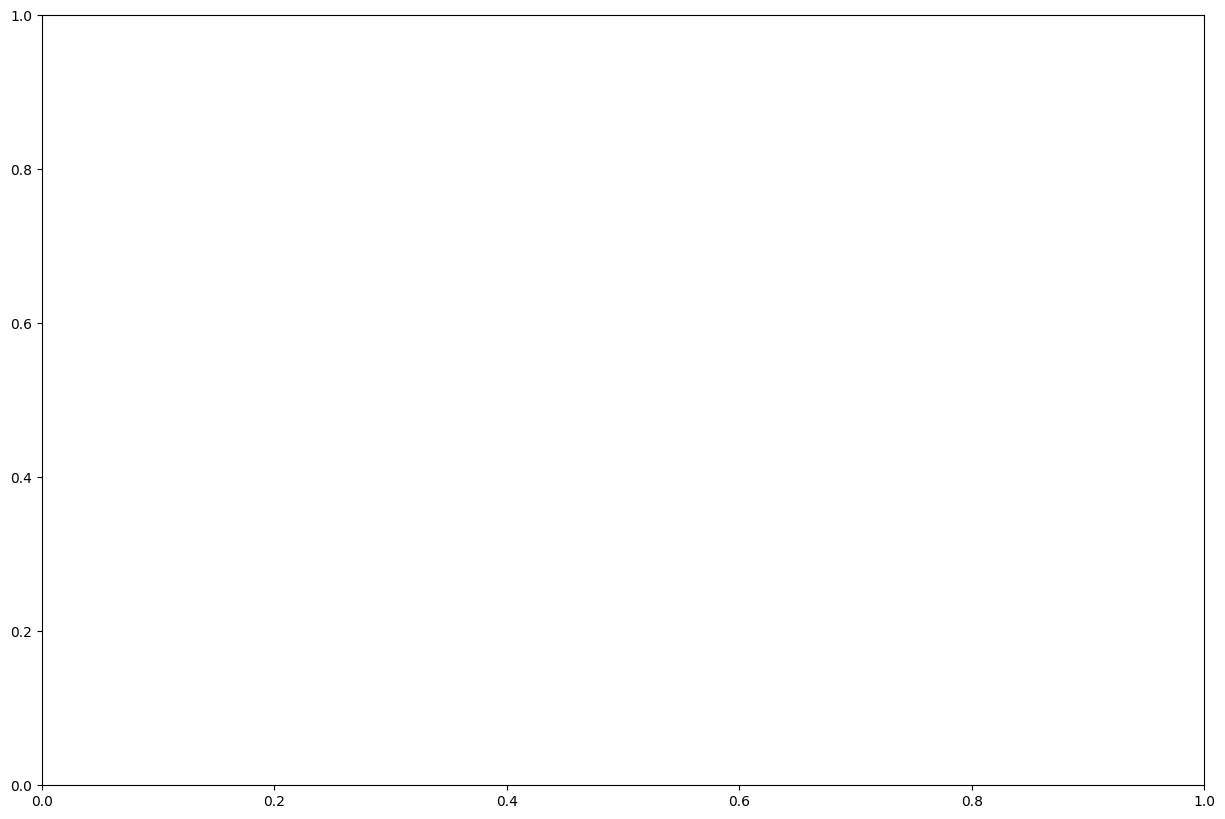

In [79]:
plot_clustered_locations(df, title='Museums Clustered by Proximity')

In [72]:
min_samples=None
min_cluster_size=3
hdb = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size, metric='euclidean')  # You can adjust parameters as needed

## Build an HDBSCAN clustering model
At this stage, you've already loaded your data and extracted the museum coordinates into a dataframe, df.

You've also stored properly scaled coordinates as the 'coords_scaled' array.

All that remains is to:
- Fit and transform HDBSCAN to your scaled coordinates
- Extract the cluster labels
- Plot the results on the same basemap as before

Reasonable HDBSCAN parameters have been selected for you to start with.


In [77]:
min_samples=None
min_cluster_size=3
hdb = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size, metric='euclidean')  # You can adjust parameters as needed